EDA of Prosper Marketplace loan data by Zhaowei Liang
========================================================


# 1. Introduction and data wrangling

In [302]:
# Load all of the packages that you end up using in your analysis in this code
# chunk.

# Notice that the parameter "echo" was set to FALSE for this code chunk. This
# prevents the code from displaying in the knitted HTML output. You should set
# echo=FALSE for all code chunks in your file, unless it makes sense for your
# report to show the code that generated a particular plot.

# The other parameters for "message" and "warning" should also be set to FALSE
# for other code chunks once you have verified that each plot comes out as you
# want it to. This will clean up the flow of your report.

library(ggplot2)
library(anytime)
library(dplyr)
library(GGally)
library(plot3D)

In [2]:
# Load the Data
raw <- read.csv("prosperLoanData.csv")

In [243]:
#review variables
names(raw)

[1] "ListingKey"                          "ListingNumber"                      
 [3] "ListingCreationDate"                 "CreditGrade"                        
 [5] "Term"                                "LoanStatus"                         
 [7] "ClosedDate"                          "BorrowerAPR"                        
 [9] "BorrowerRate"                        "LenderYield"                        
[11] "EstimatedEffectiveYield"             "EstimatedLoss"                      
[13] "EstimatedReturn"                     "ProsperRating..numeric."            
[15] "ProsperRating..Alpha."               "ProsperScore"                       
[17] "ListingCategory..numeric."           "BorrowerState"                      
[19] "Occupation"                          "EmploymentStatus"                   
[21] "EmploymentStatusDuration"            "IsBorrowerHomeowner"                
[23] "CurrentlyInGroup"                    "GroupKey"                           
[25] "DateCreditPulled"                    "CreditScoreRangeLower"              
[27] "CreditScoreRangeUpper"               "FirstRecordedCreditLine"            
[29] "CurrentCreditLines"                  "OpenCreditLines"                    
[31] "TotalCreditLinespast7years"          "OpenRevolvingAccounts"              
[33] "OpenRevolvingMonthlyPayment"         "InquiriesLast6Months"               
[35] "TotalInquiries"                      "CurrentDelinquencies"               
[37] "AmountDelinquent"                    "DelinquenciesLast7Years"            
[39] "PublicRecordsLast10Years"            "PublicRecordsLast12Months"          
[41] "RevolvingCreditBalance"              "BankcardUtilization"                
[43] "AvailableBankcardCredit"             "TotalTrades"                        
[45] "TradesNeverDelinquent..percentage."  "TradesOpenedLast6Months"            
[47] "DebtToIncomeRatio"                   "IncomeRange"                        
[49] "IncomeVerifiable"                    "StatedMonthlyIncome"                
[51] "LoanKey"                             "TotalProsperLoans"                  
[53] "TotalProsperPaymentsBilled"          "OnTimeProsperPayments"              
[55] "ProsperPaymentsLessThanOneMonthLate" "ProsperPaymentsOneMonthPlusLate"    
[57] "ProsperPrincipalBorrowed"            "ProsperPrincipalOutstanding"        
[59] "ScorexChangeAtTimeOfListing"         "LoanCurrentDaysDelinquent"          
[61] "LoanFirstDefaultedCycleNumber"       "LoanMonthsSinceOrigination"         
[63] "LoanNumber"                          "LoanOriginalAmount"                 
[65] "LoanOriginationDate"                 "LoanOriginationQuarter"             
[67] "MemberKey"                           "MonthlyLoanPayment"                 
[69] "LP_CustomerPayments"                 "LP_CustomerPrincipalPayments"       
[71] "LP_InterestandFees"                  "LP_ServiceFees"                     
[73] "LP_CollectionFees"                   "LP_GrossPrincipalLoss"              
[75] "LP_NetPrincipalLoss"                 "LP_NonPrincipalRecoverypayments"    
[77] "PercentFunded"                       "Recommendations"                    
[79] "InvestmentFromFriendsCount"          "InvestmentFromFriendsAmount"        
[81] "Investors"

The dataset contains more than 100,000 loans't data with 81 features for each loan from Prosper Marketplace Loan company. The [dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) described what does each variable represents. The variables that worth investigating was picked by my limited knowledge in finance. However, later in the analysis, more variables might be added in analysis according to correlations between variables. 

In [244]:
#pick features of interest can organize them in to a list
selected_features <- c('ListingKey', 'ListingCreationDate', 'Term', 'LoanStatus', 'CreditGrade', 
                      'ListingCategory..numeric.', 'ProsperScore', 'BorrowerState', 'Occupation',
                      'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
                      'IncomeRange', 'IncomeVerifiable', 'TotalCreditLinespast7years', 'TotalProsperLoans',
                      'LoanOriginationDate', 'LoanOriginalAmount', 'PercentFunded', 'Investors', 'StatedMonthlyIncome'
                     )

In [245]:
#subset picked features from the raw dataset according to the list created in last chunk
loan_df = raw[, selected_features]

In [43]:
str(loan_df)

'data.frame':	113937 obs. of  21 variables:
 $ ListingKey                : Factor w/ 113066 levels "00003546482094282EF90E5",..: 7180 7193 6647 6669 6686 6689 6699 6706 6687 6687 ...
 $ ListingCreationDate       : Factor w/ 113064 levels "2005-11-09 20:44:28.847000000",..: 14184 111894 6429 64760 85967 100310 72556 74019 97834 97834 ...
 $ Term                      : int  36 36 36 36 36 60 36 36 36 36 ...
 $ LoanStatus                : Factor w/ 12 levels "Cancelled","Chargedoff",..: 3 4 3 4 4 4 4 4 4 4 ...
 $ CreditGrade               : Factor w/ 9 levels "","A","AA","B",..: 5 1 8 1 1 1 1 1 1 1 ...
 $ ListingCategory..numeric. : int  0 2 0 16 2 1 1 2 7 7 ...
 $ ProsperScore              : num  NA 7 NA 9 4 10 2 4 9 11 ...
 $ BorrowerState             : Factor w/ 52 levels "","AK","AL","AR",..: 7 7 12 12 25 34 18 6 16 16 ...
 $ Occupation                : Factor w/ 68 levels "","Accountant/CPA",..: 37 43 37 52 21 43 50 29 24 24 ...
 $ EmploymentStatusDuration  : int  2 44 NA 113 44 82 1

In [182]:
names(loan_df)

[1] "ListingKey"                 "ListingCreationDate"       
 [3] "Term"                       "LoanStatus"                
 [5] "CreditGrade"                "ListingCategory..numeric." 
 [7] "ProsperScore"               "BorrowerState"             
 [9] "Occupation"                 "EmploymentStatusDuration"  
[11] "IsBorrowerHomeowner"        "CreditScoreRangeLower"     
[13] "CreditScoreRangeUpper"      "IncomeRange"               
[15] "IncomeVerifiable"           "TotalCreditLinespast7years"
[17] "TotalProsperLoans"          "LoanOriginationDate"       
[19] "LoanOriginalAmount"         "PercentFunded"             
[21] "Investors"                  "ListingCreationYear"       
[23] "creditrange"                "LoanOriginationYear"       
[25] "DeliquencyState"

20 variables and 113937 observation are picked for analyzing. 

In [44]:
#create a new column contains only years of all listing
loan_df$ListingCreationDate <- anydate(loan_df$ListingCreationDate)
loan_df$ListingCreationYear <- strftime(loan_df$ListingCreationDate, "%Y")

In [58]:
loan_year <- table(loan_df$ListingCreationYear)
print(loan_year)


 2005  2006  2007  2008  2009  2010  2011  2012  2013  2014 
   23  6213 11557 11263  2206  5530 11442 19556 35413 10734 


In [56]:
#ggplot(data = loan_df, aes(ListingCreationYear)) + geom_bar(aes(x = ListingCreationYear, y = freq), stat="identity")

# 2. Univariate Plots Section


## 2.1 Borrowers' states
Geographical information is critical for the growth of a company. Firstly, analyze what state owns the most of loans on Proser Marketplace. However, since the population density is vary from state to state, this result may be less informative than people normally think.

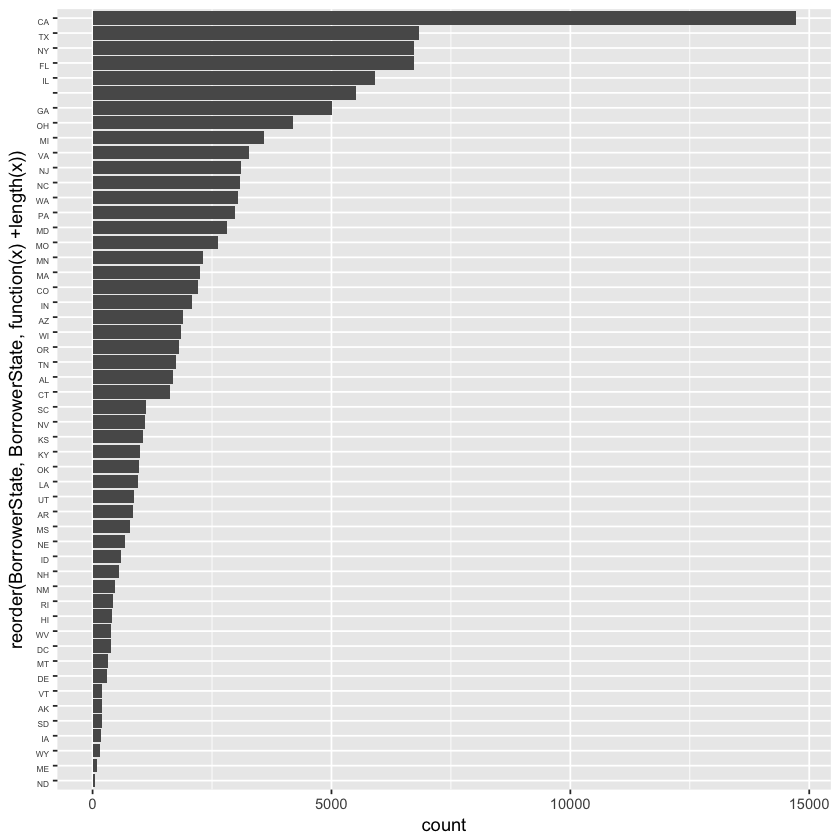

In [296]:

ggplot(loan_df,aes(x=reorder(BorrowerState,BorrowerState,
                     function(x)+length(x)))) + 
        geom_bar() + coord_flip() + theme(axis.text.y = element_text(size=5,vjust=1)) 

In [82]:

table(loan_df$BorrowerState)



         AK    AL    AR    AZ    CA    CO    CT    DC    DE    FL    GA    HI 
 5515   200  1679   855  1901 14717  2210  1627   382   300  6720  5008   409 
   IA    ID    IL    IN    KS    KY    LA    MA    MD    ME    MI    MN    MO 
  186   599  5921  2078  1062   983   954  2242  2821   101  3593  2318  2615 
   MS    MT    NC    ND    NE    NH    NJ    NM    NV    NY    OH    OK    OR 
  787   330  3084    52   674   551  3097   472  1090  6729  4197   971  1817 
   PA    RI    SC    SD    TN    TX    UT    VA    VT    WA    WI    WV    WY 
 2972   435  1122   189  1737  6842   877  3278   207  3048  1842   391   150 


From the bar plot above, we can see that California has most total loans. Meanwhile, the total number of loans distributed similarly as population. One interesting find is there are 5515 loans has unkonwn state, are they from out of United States or it is data entry error? It is hard to allocate these loans to a specific states without additional data from Prosper Marketplace.



## 2.2 Occupation
Will loaner's occupation affects there chance of getting investors? Is there any occupation discriminate on Prosper MarketPlace? To better answer these question, total amount of loans for different occupations are analyzed first. 

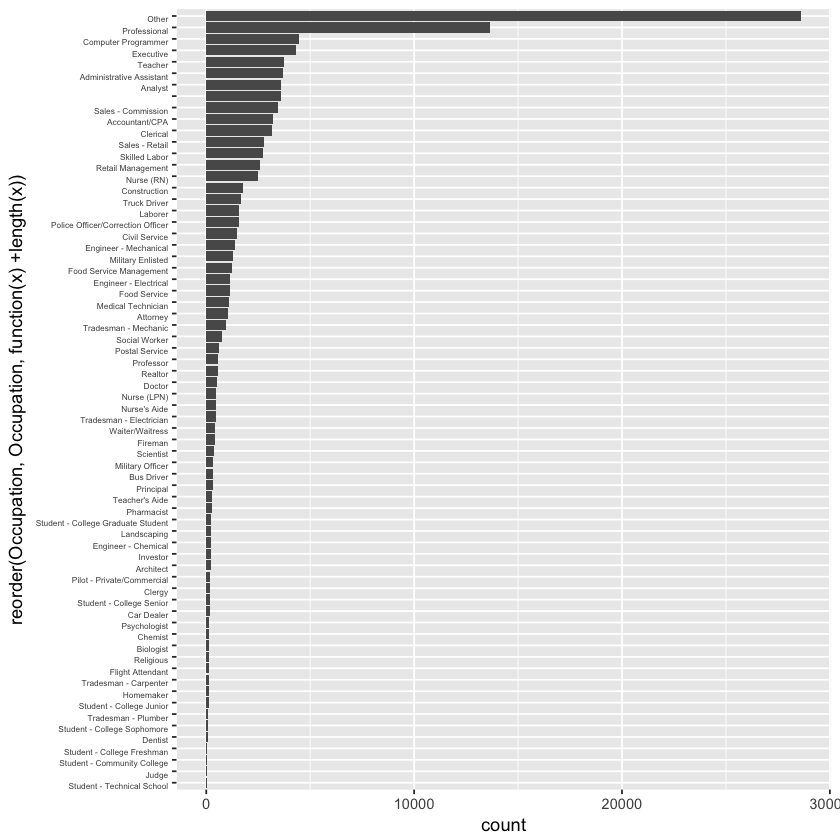

In [295]:

ggplot(loan_df,aes(x=reorder(Occupation,Occupation,
                     function(x)+length(x)))) + 
        geom_bar() + coord_flip() + theme(axis.text.y = element_text(size=5,vjust=1)) 


Obviously, the dropdown menu on Prosper Marketplaces's website is not exhaustive. The occupation "Other" siginificantly skewed the distribution.

## 2.3 Employment Status Duration




In [97]:
sample(loan_df$EmploymentStatusDuration, 15)

[1]  83  21  75   5 157   6   2  10  NA 533  29 116  NA  40 109

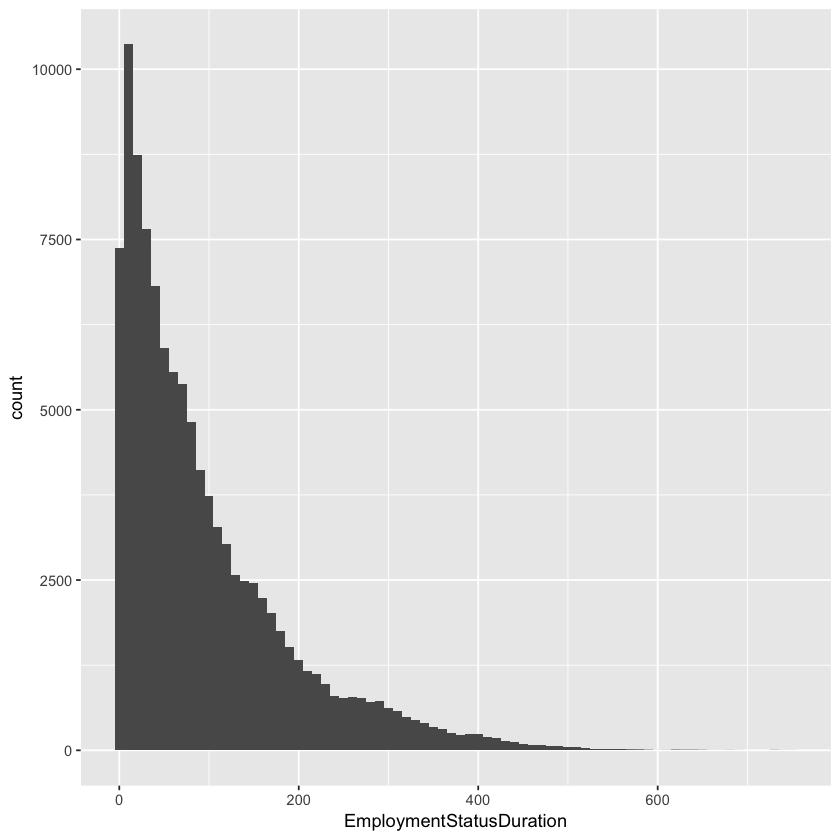

In [114]:

ggplot(data = subset(loan_df, !is.na(EmploymentStatusDuration)), aes(EmploymentStatusDuration)) + 
       geom_histogram(stat = "bin", binwidth = 10)



As shown in the graph above, most of the loaners provided employement data on this website do have a fairly short employment status history.



## 2.4 Credit Score
The credit score records is dvided into two features: 
1. CreditScoreRangeLower
2. CreditScoreRangeUpper
Firstly, the relationship between this two features is determined.

In [113]:
loan_df$creditrange <- loan_df$CreditScoreRangeUpper - loan_df$CreditScoreRangeLower
table(loan_df$creditrange)


    19 
113346 

In [116]:
table(loan_df$CreditScoreRangeUpper)


   19   379   439   459   479   499   519   539   559   579   599   619   639 
  133     1     5    36   141   346   554  1593  1474  1357  1125  3602  4172 
  659   679   699   719   739   759   779   799   819   839   859   879   899 
12199 16366 16492 15471 12923  9267  6606  4624  2644  1409   567   212    27 

As show above, the the creditscorerangeupper is mostly 19 more than the creditscorerangelower. According to the properties of expected values. Only one of these variables needs to analyzed. 

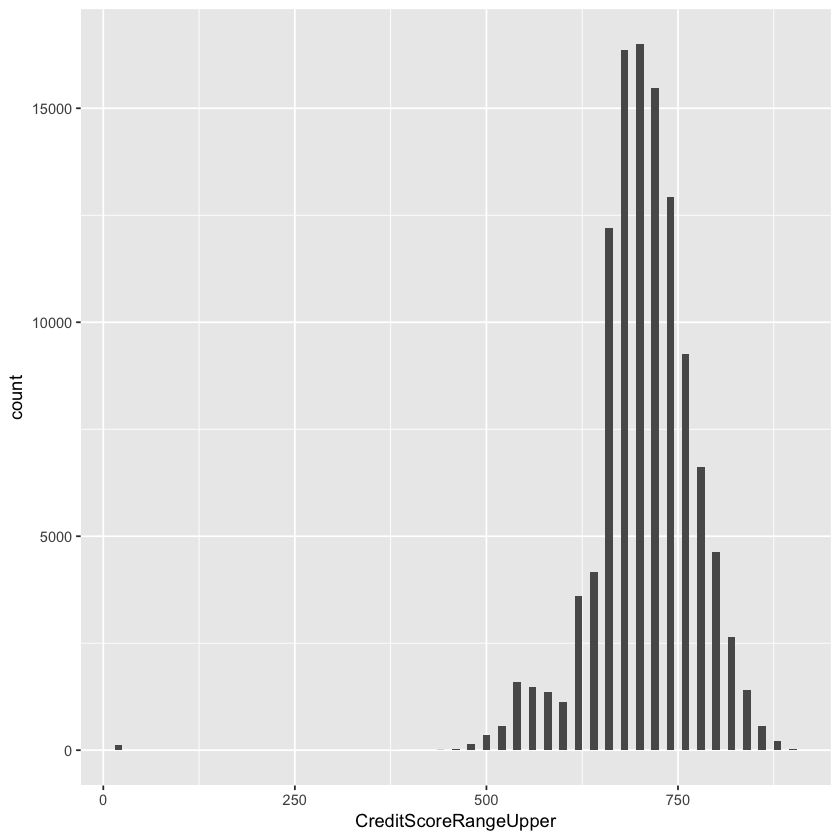

In [121]:
ggplot(data = subset(loan_df, !is.na(CreditScoreRangeUpper)), aes(CreditScoreRangeUpper)) + 
       geom_histogram(stat = "bin", binwidth = 10)

As shown above, the distribution of credit score shows approximate normal distribution if we neglect outliers at 19.

## 2.5 Income Range

In [123]:
table(loan_df$IncomeRange)


            $0      $1-24,999      $100,000+ $25,000-49,999 $50,000-74,999 
           621           7274          17337          32192          31050 
$75,000-99,999  Not displayed   Not employed 
         16916           7741            806 

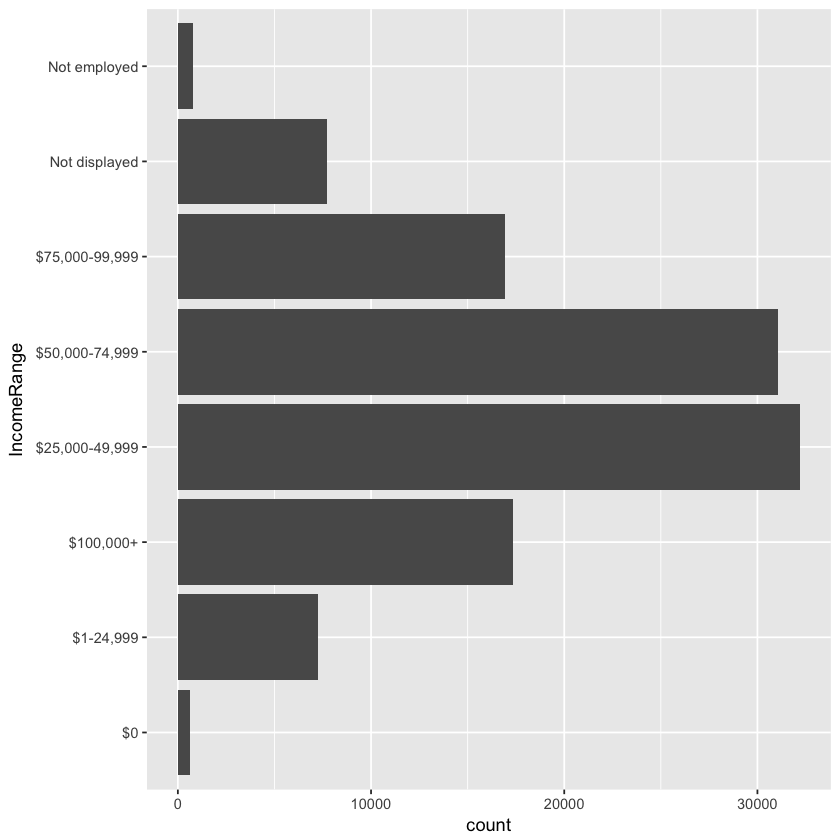

In [126]:
ggplot(loan_df,aes(IncomeRange)) + 
        geom_bar() + coord_flip()

As show in the graph above, the income range of lenders is a good representation of financial state of lenders. Quite a number of incomes is not displayed. But mostly the income range of lenders is concentrated below $50,000.

## 2.6 Total Credit Line

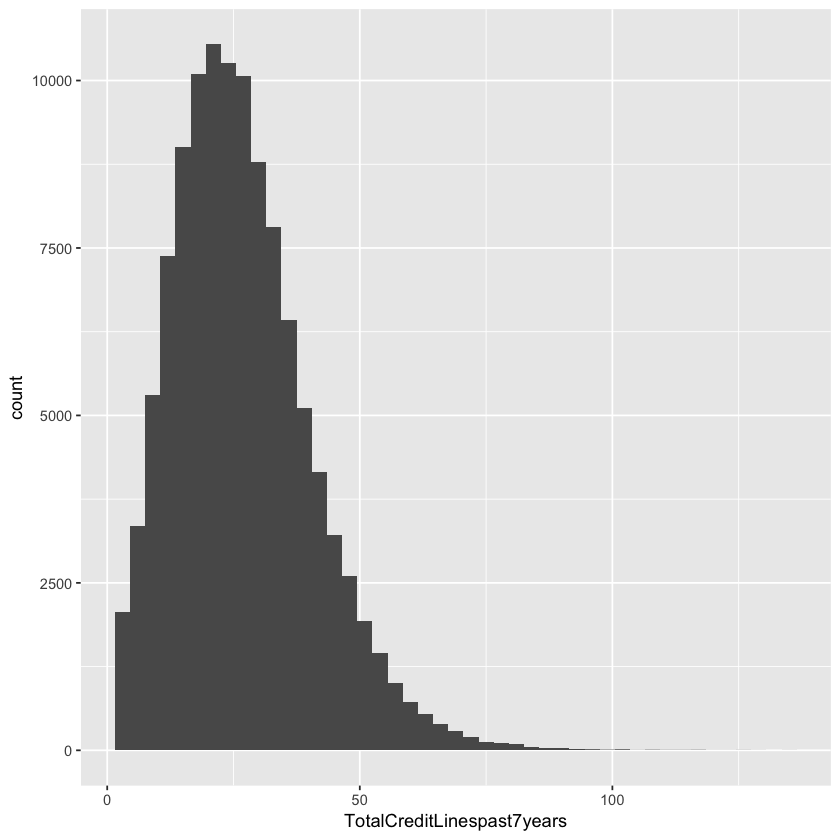

In [129]:
ggplot(data = subset(loan_df, !is.na(TotalCreditLinespast7years)), aes(TotalCreditLinespast7years)) + 
       geom_histogram(stat = "bin", binwidth = 3)

## 2.7 Loan Origination Date
The purpose of analyzing loan origination date is verify of the data

In [130]:
loan_df$LoanOriginationDate <- anydate(loan_df$LoanOriginationDate)
loan_df$LoanOriginationYear <- strftime(loan_df$LoanOriginationDate, "%Y")

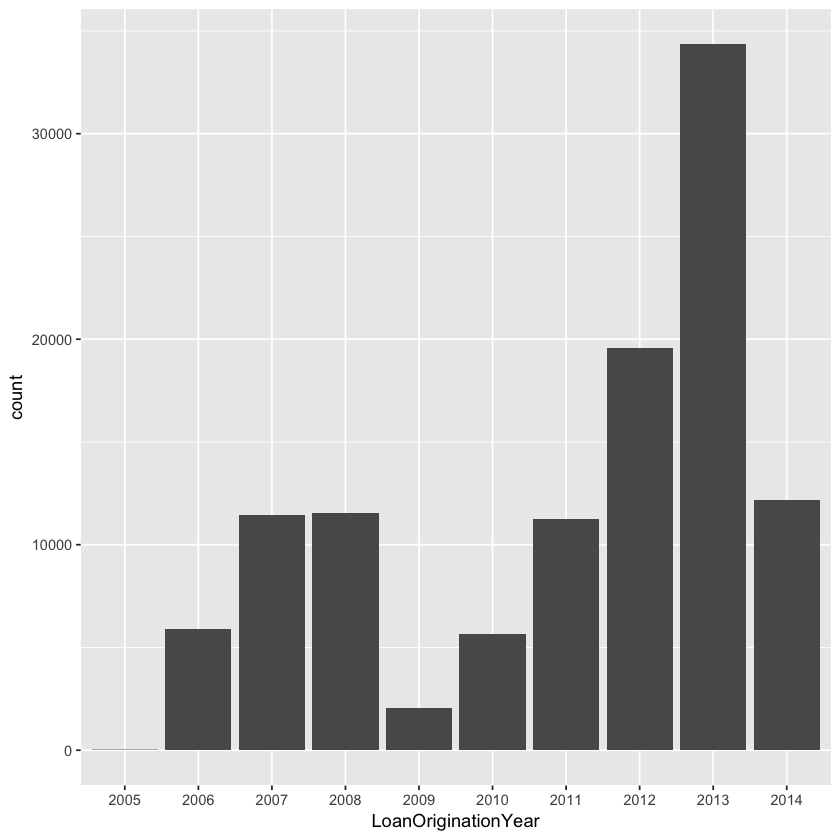

In [132]:
ggplot(loan_df,aes(LoanOriginationYear )) + 
        geom_bar()

## 2.8 Loan amount

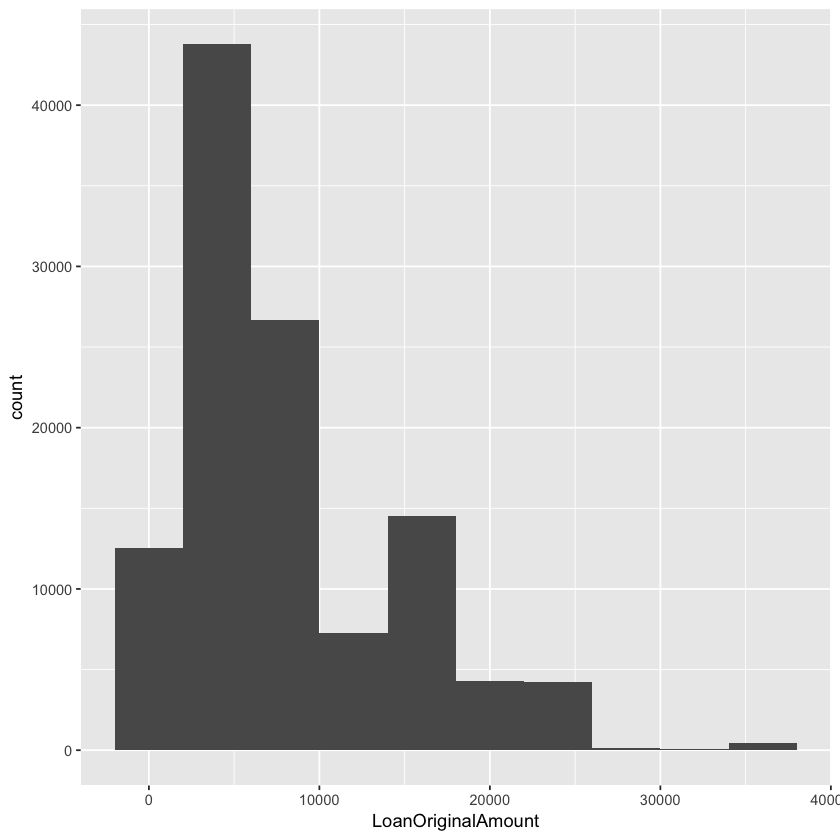

In [145]:
ggplot(data = subset(loan_df, !is.na(LoanOriginalAmount)), aes(LoanOriginalAmount)) + 
       geom_histogram(stat = "bin", binwidth = 4000)

In [147]:
amount_list <- sort(table(loan_df$LoanOriginalAmount), decreasing = T)
head(amount_list, 20)


 4000 15000 10000  5000  2000  3000 25000 20000  1000  2500  7500  7000  6000 
14333 12407 11106  6990  6067  5749  3630  3291  3206  2992  2975  2949  2869 
 3500  8000 12000  9000 13000  1500  4500 
 2567  2442  1921  1695  1509  1507  1406 

Most of the loan amount is on numbers that looks more "integer" like 4000, 15000 insteand 15232 or 4355. Because the Prosper MarketPlace doesn't gurantee this amount will be fully funded, its make sense that most lenders put a approximate number to take the most from investers.

## 2.10 Number of investors

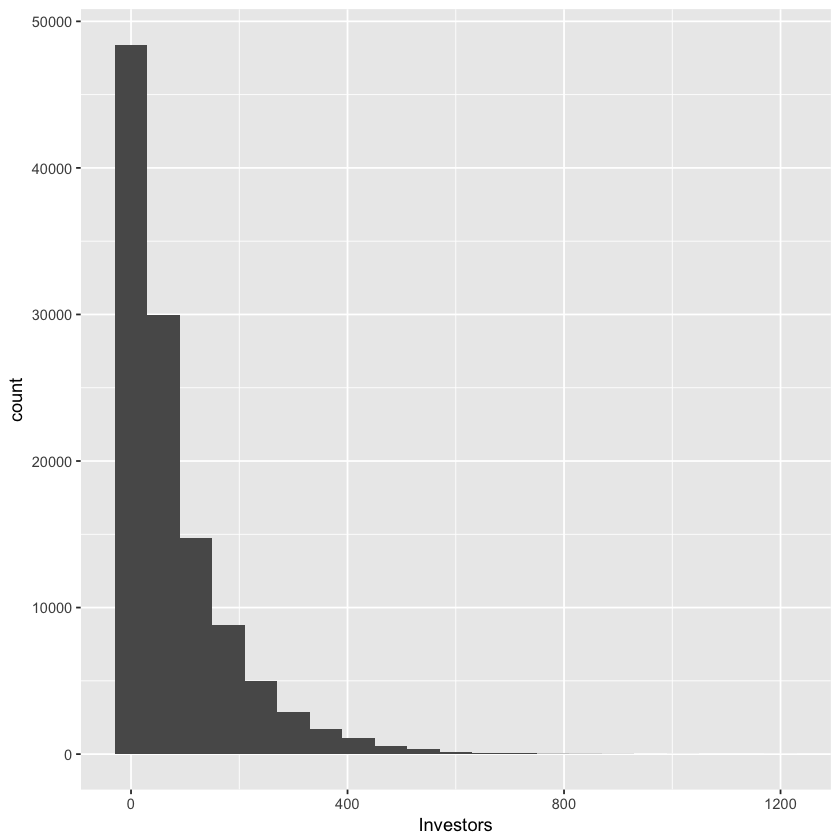

In [163]:
ggplot(data = subset(loan_df, !is.na(Investors)), aes(Investors)) + 
       geom_histogram(stat = "bin", binwidth = 60)

## 2.11 Loan status (Main Feature)
There are multiple status of loans per data dictionary:

Cancelled
Chargedoff
Completed
Current
Defaulted
FinalPaymentInProgress
Past due(Followed by buckets)

In [169]:
levels(loan_df$LoanStatus)

[1] "Cancelled"              "Chargedoff"             "Completed"             
 [4] "Current"                "Defaulted"              "FinalPaymentInProgress"
 [7] "Past Due (>120 days)"   "Past Due (1-15 days)"   "Past Due (16-30 days)" 
[10] "Past Due (31-60 days)"  "Past Due (61-90 days)"  "Past Due (91-120 days)"

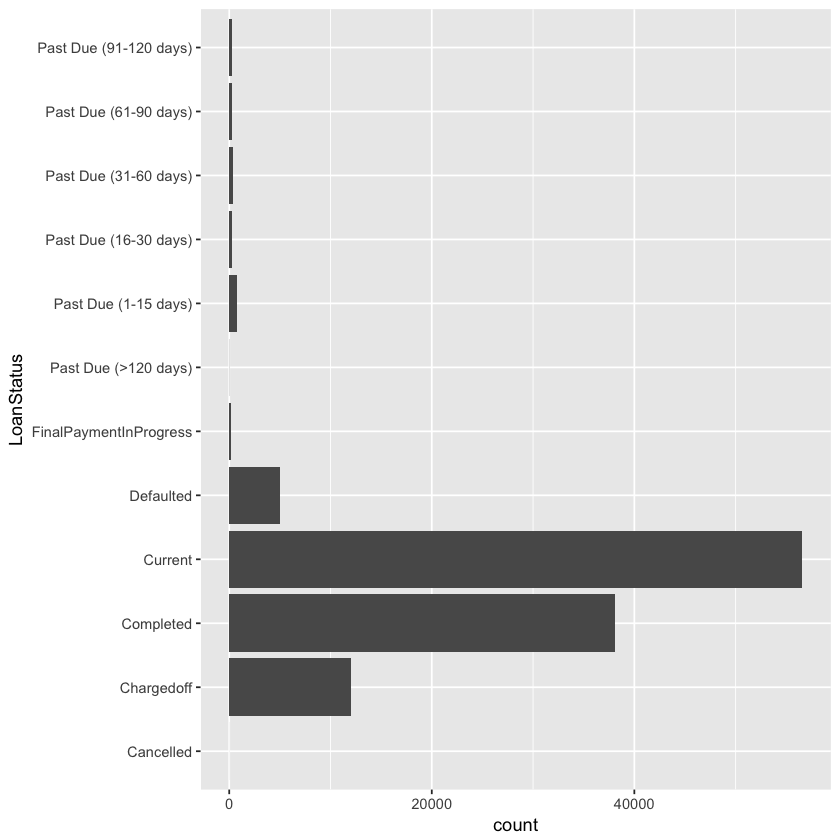

In [166]:
ggplot(loan_df,aes(LoanStatus)) + 
        geom_bar() + coord_flip()


As seen in this graph, the mojority of loans is in their "Current" Status. Becuase the loan status is also the main feature of our analysis, we need to go one step further on.

The loans status feature has 12 levels:


In [170]:

levels(loan_df$LoanStatus)


[1] "Cancelled"              "Chargedoff"             "Completed"             
 [4] "Current"                "Defaulted"              "FinalPaymentInProgress"
 [7] "Past Due (>120 days)"   "Past Due (1-15 days)"   "Past Due (16-30 days)" 
[10] "Past Due (31-60 days)"  "Past Due (61-90 days)"  "Past Due (91-120 days)"


To make the analsis easier in later stage, these levels will be divided into 2 groups: Good loans and Bad loans, in the other word, the deliquency state of loans. After read the wikipedia and investopedia page of these words, they are divided as follow:

- Good loans():
    - Cancelled
    - Completed
    - Current
    - FinalPaymentInProgress
    - Past Due (1-15 days) 
    - Past Due (16-30 days)

- bad (deliquented) loans:
    - Chargedoff
    - Defaulted
    - Past Due (>120 days) 
    - Past Due (31-60 days) 
    - Past Due (61-90 days) 
    - Past Due (91-120 days)

A new column called "DeliquencyState" is created based on the creteria above. Under this column, 1 represent loans with deliquencies and 0 represents loans without deliquencies.

In [246]:
loan_df$DeliquencyState <- ifelse(
                                      loan_df$LoanStatus == "Chargedoff" |
                                      loan_df$LoanStatus == "Defaulted" |
                                      loan_df$LoanStatus == "Past Due (>120 days)" |
                                      loan_df$LoanStatus == "Past Due (31-60 days)" |
                                      loan_df$LoanStatus == "Past Due (61-90 days)" |
                                      loan_df$LoanStatus == "Past Due (91-120 days)",
                                       'delinquent', 'GoodStanding')

In [247]:
table(loan_df$DeliquencyState)


  delinquent GoodStanding 
       18006        95931 

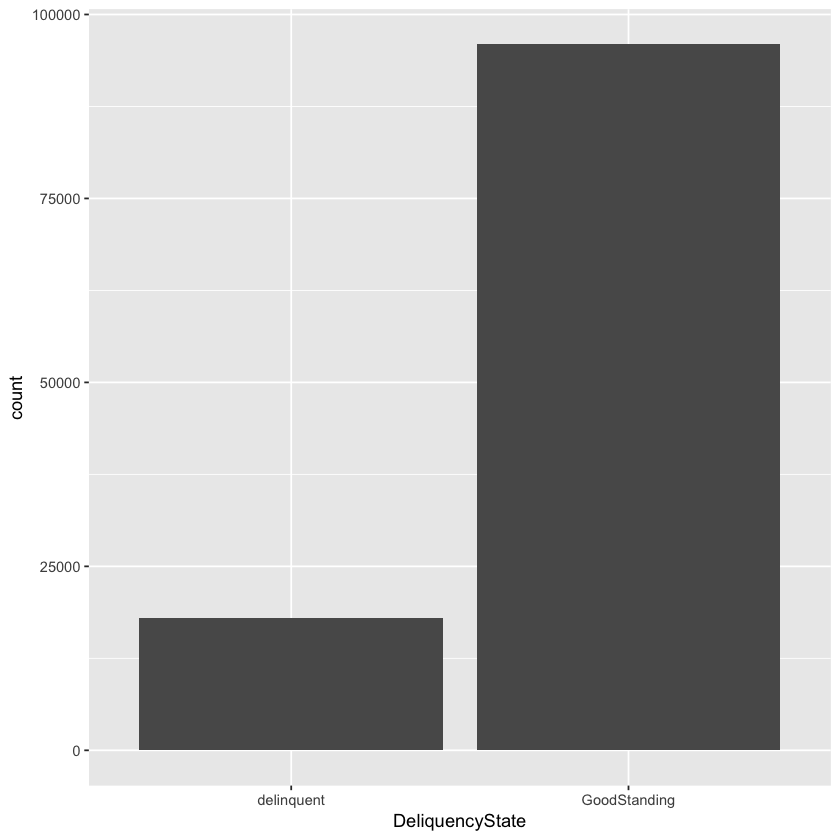

In [314]:
ggplot(data = loan_df, aes(DeliquencyState)) + geom_bar()

## 2.12 Univariate Analysis


### What is the structure of your dataset?

At the beginning of univariate analysis

### What is/are the main feature(s) of interest in your dataset?

The main features of interest in my analysis are the status of the loan and the number of investors. 

There are multiple status of loans per data dictionary:

Cancelled
Chargedoff
Completed
Current
Defaulted
FinalPaymentInProgress
Past due(Followed by buckets) ...

They are divided and regrouped into a new feature: DeliquencyState which is now the feature of interest.



### What other features in the dataset do you think will help support your \ investigation into your feature(s) of interest?

'ListingKey' 'ListingCreationDate' 'Term' 'LoanStatus' 'CreditGrade' 'ListingCategory..numeric.' 'ProsperScore' 'BorrowerState' 'Occupation' 'EmploymentStatusDuration' 'IsBorrowerHomeowner' 'CreditScoreRangeLower' 'CreditScoreRangeUpper' 'IncomeRange' 'IncomeVerifiable' 'TotalCreditLinespast7years' 'TotalProsperLoans' 'LoanOriginationDate' 'LoanOriginalAmount' 'PercentFunded' 'Investors' 'ListingCreationYear' 'creditrange' 'LoanOriginationYear' 'DeliquencyState'

### Did you create any new variables from existing variables in the dataset?

Yes, I created two variables to help my analysis:
1. LoanOriginationYear: this variable is parsed from LoanOriginationDate data in order to determine if the sample are radomly picked through years.

2. DeliquencyState: a binary column to determine the status of a loan. This variable is regrouped from loan status feature. 

### Of the features you investigated, were there any unusual distributions? \ Did you perform any operations on the data to tidy, adjust, or change the form \ of the data? If so, why did you do this?

I changed the data type of LoanOriginationDate to datetime so I can parse the year of loan origination much easier.




# 3. Bivariate Plots Section

This section is divided into 3 parts:
1. Relationship between loan status and support features.
2. Relationship between number of investors and supporting features
3. Relationship between some supporting features

## 3.1 Loan status (Deliquency State )

## 3.1.1 Deliquency State and  Employment Status Duration

Warning message:
“Removed 591 rows containing non-finite values (stat_boxplot).”

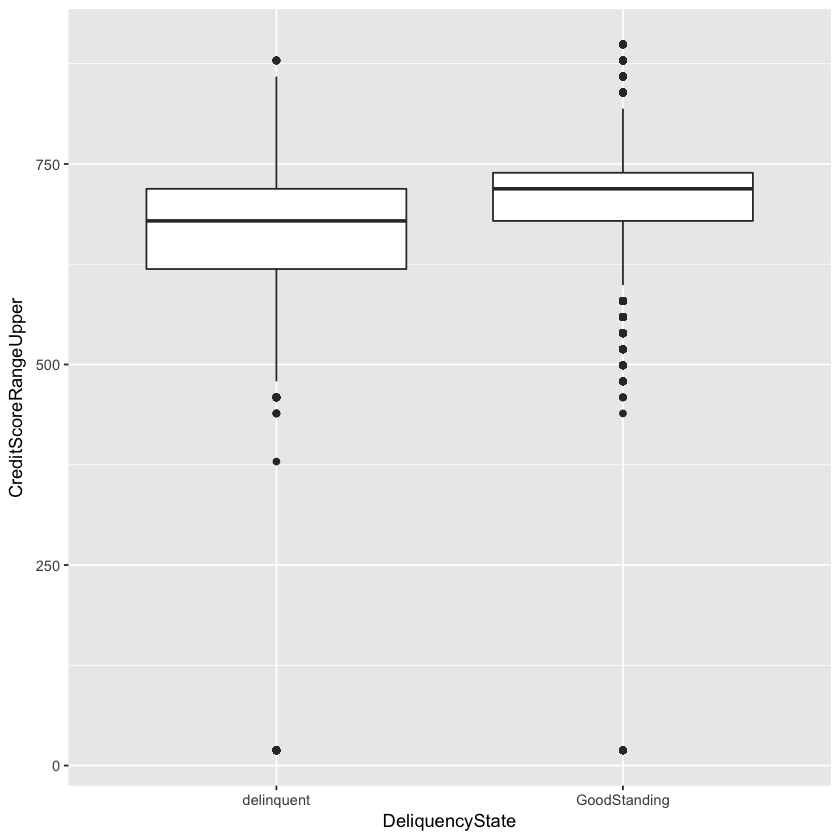

In [192]:

ggplot(data = loan_df, aes(x = DeliquencyState, y = CreditScoreRangeUpper)) + 
      geom_boxplot()

## 3.1.2 Deliquency State and  Income Range

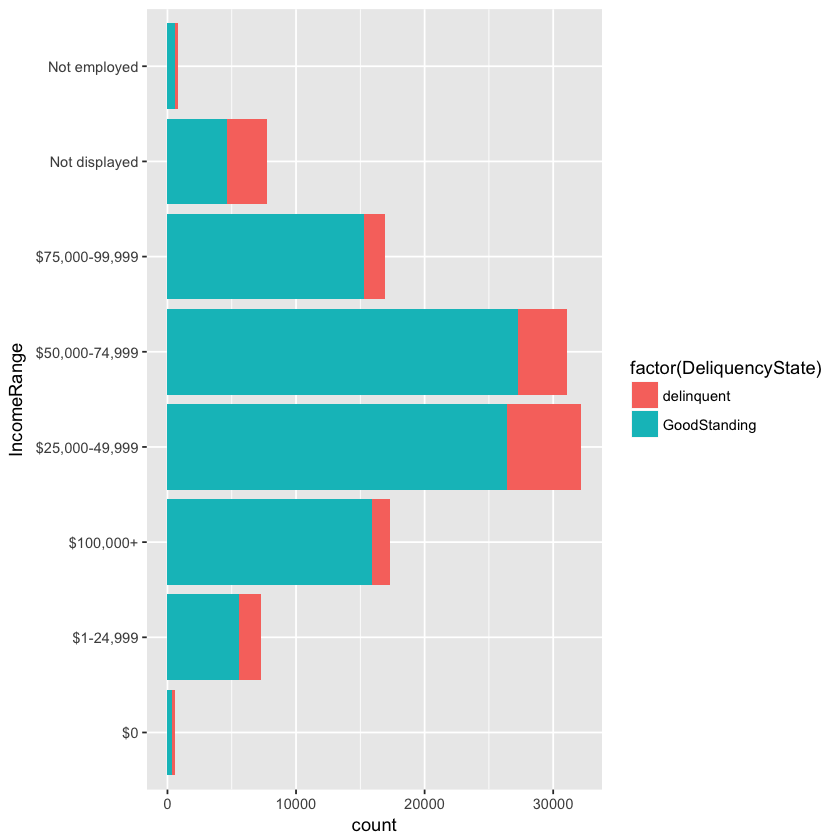

In [194]:
ggplot(data = loan_df, aes(IncomeRange, fill = factor(DeliquencyState))) + geom_bar() + coord_flip()

Although it is obvious that borrowers that has income range from 25,000 to 49,999 has most of the delinquent loans, they also has most of loans in general. A more reasonable feature in this kind case would be the percent of deliquent loans compare to the total loans in that income range.

## 3.1.3 Deliquency State and  loan original amount

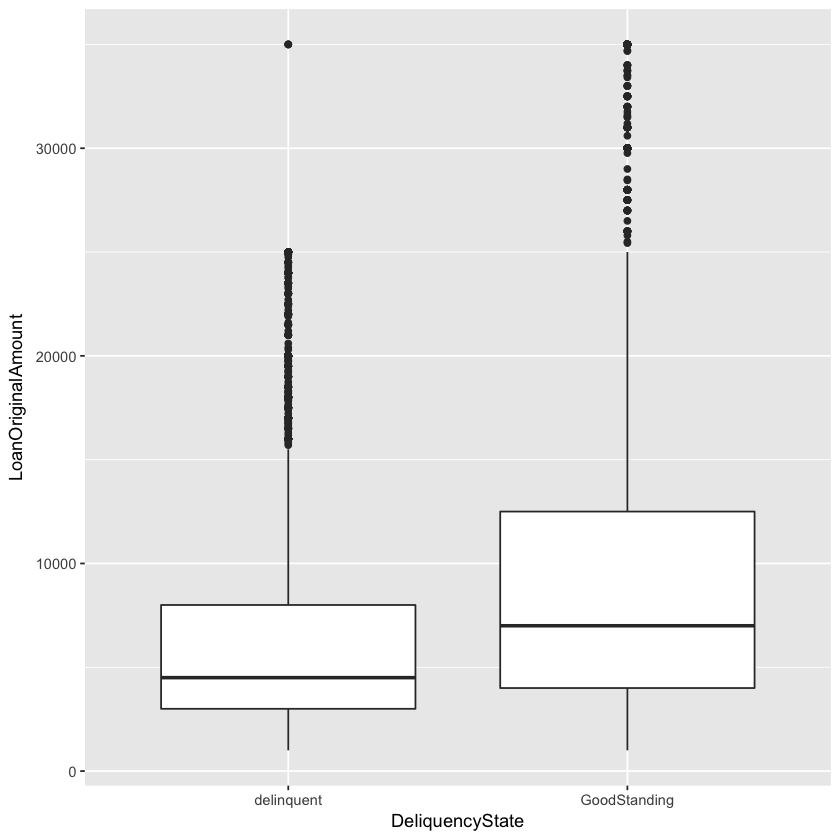

In [195]:
ggplot(data = loan_df, aes(x = DeliquencyState, y = LoanOriginalAmount)) + 
      geom_boxplot()

In contraray to the intuition, delinquent loans has lower loan amount compare to good standing loans. I was expecting delinquent has higher loan amount which makes them harder to payoff.

## 3.1.3 Deliquency State and employment duration

Warning message:
“Removed 7625 rows containing non-finite values (stat_boxplot).”

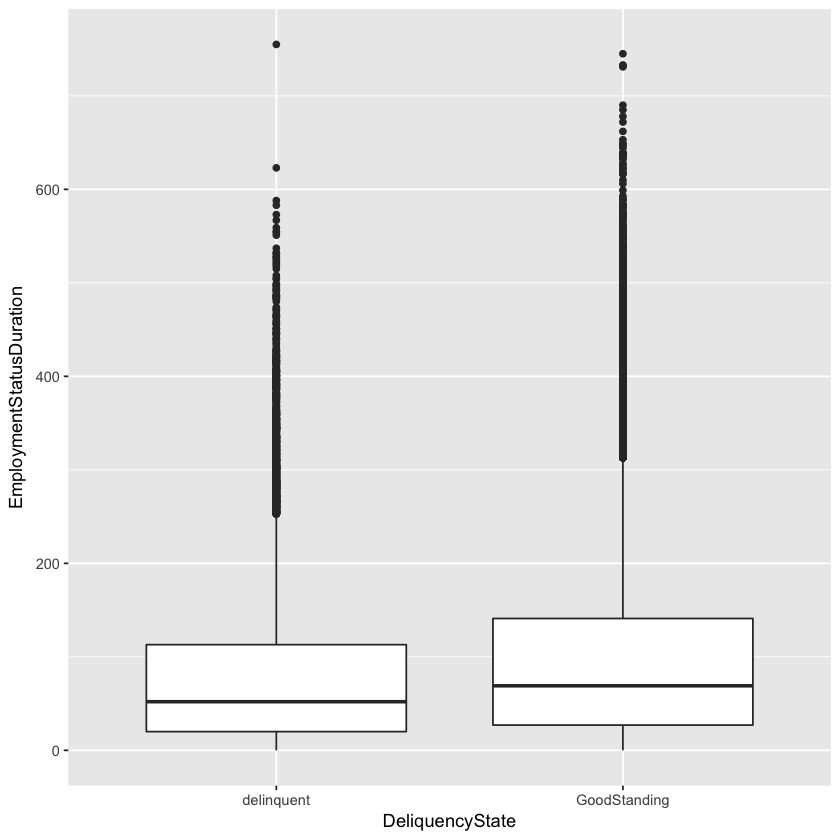

In [196]:
ggplot(data = loan_df, aes(x = DeliquencyState, y = EmploymentStatusDuration)) + 
      geom_boxplot()

The boxplot, in this case, does not make too much sense because of significant amount of data points that out of  quantiles from the mean. Because of that, I used the point plot to have visulize the employement duration.

## 3.2.1 Number of Investors and loan category
Because all listing categories are in numeric forms, it is necessary to map the english descriptvie name to them according to the data dictionary.

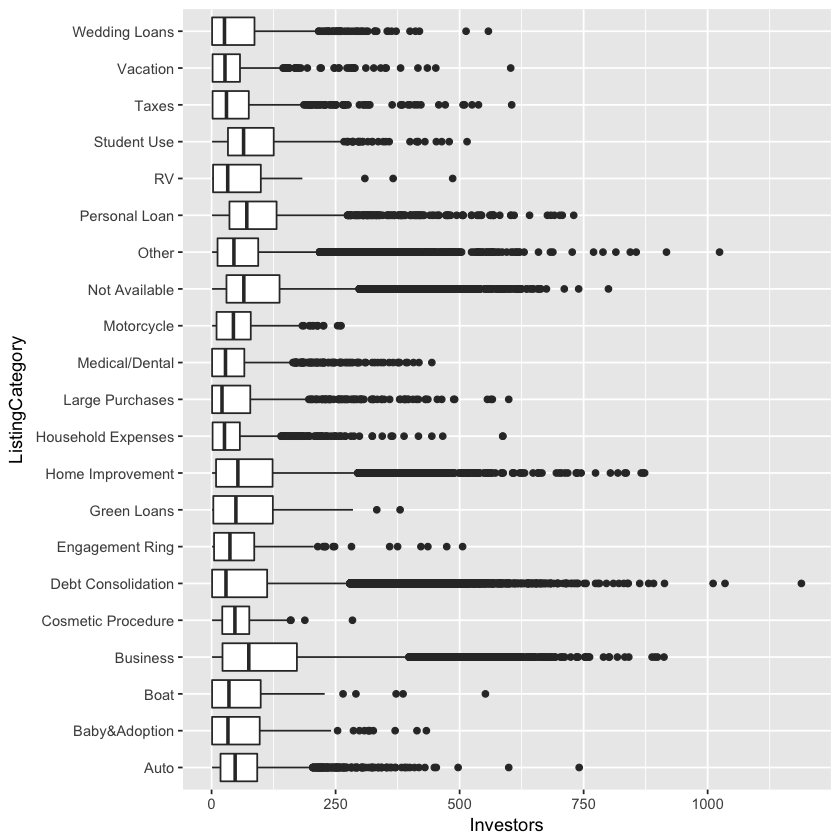

In [209]:
#convert numeric values lvevel names to factor level names
#Input category names 
CategoryName <- c("Not Available", "Debt Consolidation", "Home Improvement", "Business", "Personal Loan", 
                     "Student Use", "Auto", "Other", "Baby&Adoption", "Boat", "Cosmetic Procedure", 
                      "Engagement Ring", "Green Loans","Household Expenses", "Large Purchases", "Medical/Dental", 
                     "Motorcycle", "RV", "Taxes", "Vacation", "Wedding Loans")
#create a new column and map full category name on this new column
loan_df$ListingCategory <- CategoryName[(loan_df$ListingCategory..numeric.)+1]

ggplot(data = loan_df, aes(ListingCategory, Investors)) + geom_boxplot() + coord_flip()


## 3.2.2 Number of Investors and credit score

Will higher credit score attract more investors? A scatter plot with trend line might be able answer this question.


`geom_smooth()` using method = 'gam'
Warning message:
“Removed 724 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 724 rows containing missing values (geom_point).”

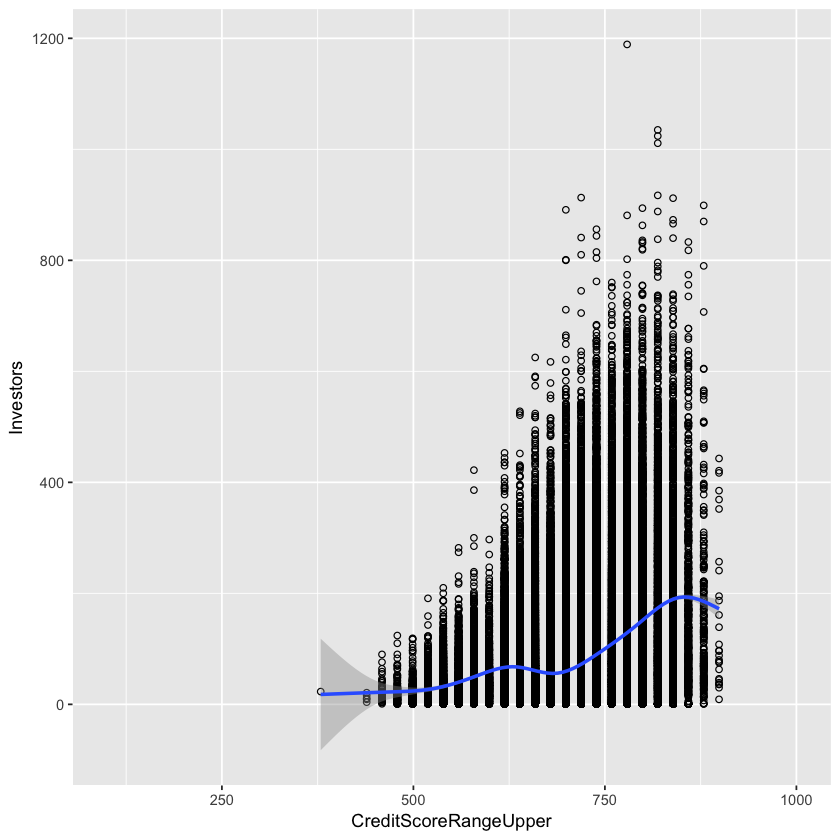

In [213]:
ggplot(data = loan_df, aes(x=CreditScoreRangeUpper, y=Investors)) + geom_point(shape=1) + 
        geom_smooth() + xlim(100, 1000)

Since it is barely possible for a person has credit score of 0, I only plotted loans with credit score above 0.
Although the relationship between credit score and is approximately position, it is noticeable that there is a downward trend after credit score go over 780.

## 3.2.3 Number of Investors and credit score

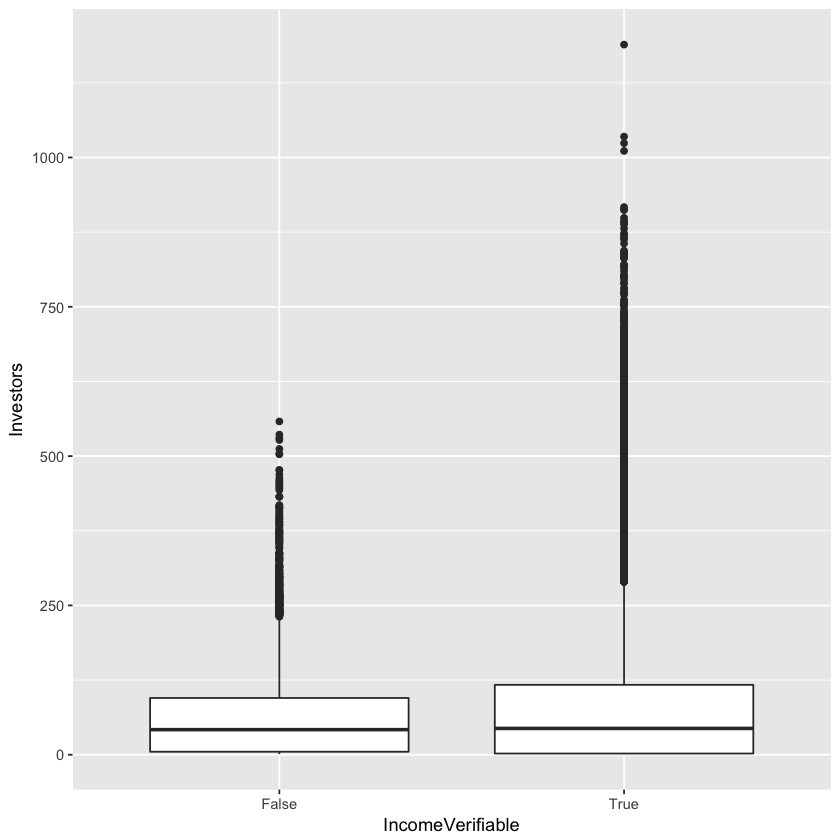

In [215]:
ggplot(data = loan_df, aes(IncomeVerifiable, Investors)) + geom_boxplot()

Interestingly, weather the income verifiable does not have obvious influence on the number of investors. 

## 3.3.1 Loan original amount and loan category

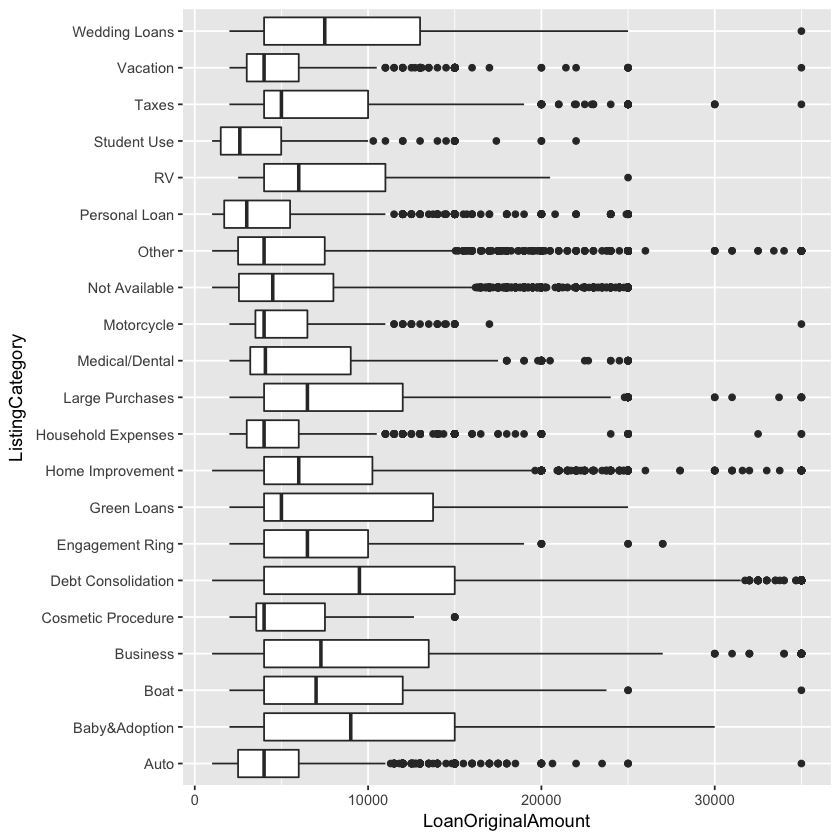

In [216]:
ggplot(data = loan_df, aes(ListingCategory, LoanOriginalAmount)) + geom_boxplot() + coord_flip()

## 3.3.2 Pearson Correlation

Warning message in ggcorr(data = loan_df, label = TRUE, size = 3, hjust = 1):
“data in column(s) 'ListingKey', 'ListingCreationDate', 'LoanStatus', 'CreditGrade', 'BorrowerState', 'Occupation', 'IsBorrowerHomeowner', 'IncomeRange', 'IncomeVerifiable', 'LoanOriginationDate', 'DeliquencyState' are not numeric and were ignored”

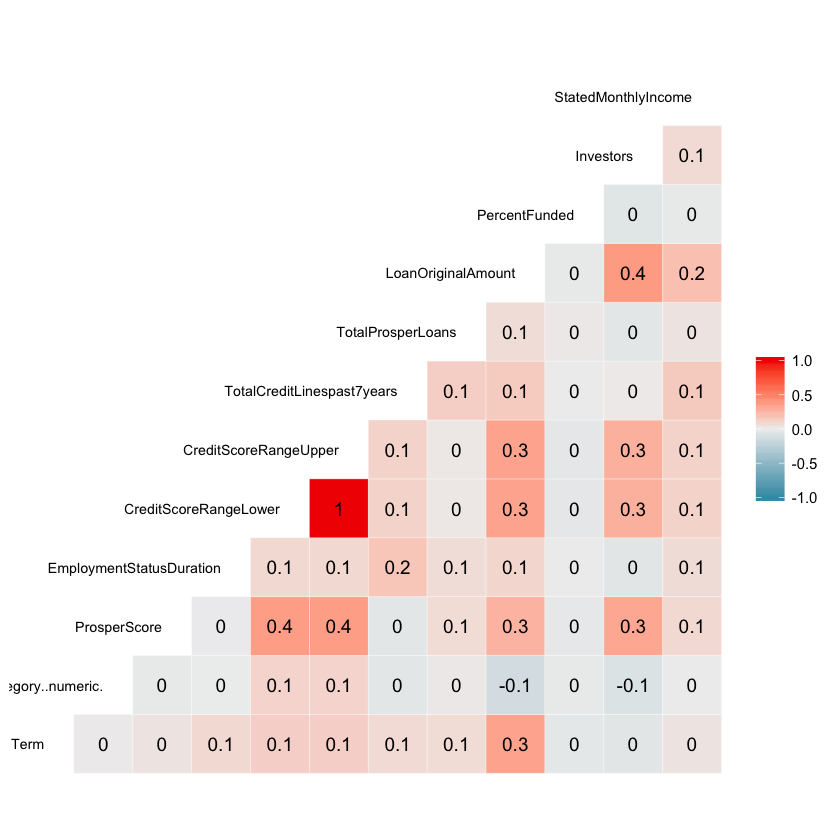

In [261]:
ggcorr(data = loan_df, label = TRUE, size = 3, hjust = 1) 

From the correlation plot above, we found fairly strong correlations between Investors and loan amount, credit score and prosper score. These three variables will be explored deeper in next plot. However, it is also necessary to keep in mind that ProsperScore have high correlations of .4 with creditrange. 


# Bivariate Analysis

### Talk about some of the relationships you observed in this part of the \ investigation. How did the feature(s) of interest vary with other features in \ the dataset?

1. For the deliquency of loans, the duration of employement and credit score seems have most obvious relationship with the deliquency state. Longer employement history and higher the credit score seems relevant to lesser deliquent loans.

2. As of the number of investors, the credit score and loan categories both have effects. The credit score has much more significant effects on the number compare to loan categories. The number of investors increased as the credit score goes up. 

### Did you observe any interesting relationships between the other features \ (not the main feature(s) of interest)?

The debt consolidation has highest median for loan amount amoung all other categories. Medical and dental loans does not own a high loan amount. The reason might be the residents of United States heavily rely on insurance and law service for health coverage. 

### What was the strongest relationship you found?

The strongest I found is the relationship between credit score and the number of investor. 


# 4. Multivariate Plots Section


## 4.1 Credit score, prosperscore, loan original amount and number of investors

In [228]:
fit <- lm(Investors ~ LoanOriginalAmount + CreditScoreRangeUpper, data = loan_df) 

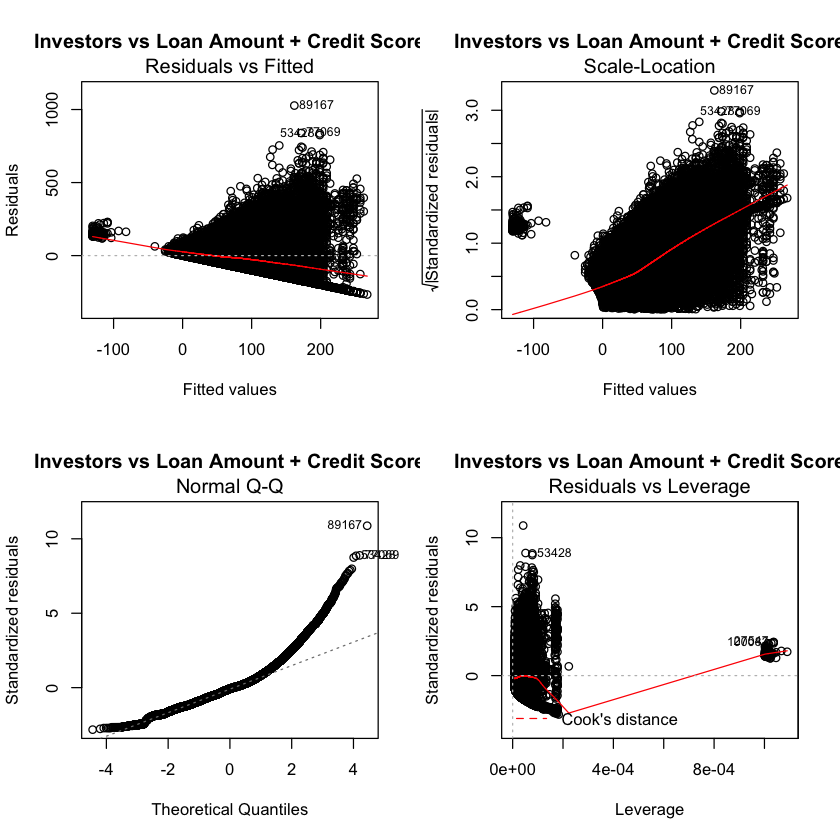

In [233]:
summary(fit)


Call:
lm(formula = Investors ~ LoanOriginalAmount + CreditScoreRangeUpper, 
    data = loan_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-266.38  -59.78   -7.54   40.92 1027.17 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -1.405e+02  3.063e+00  -45.86   <2e-16 ***
LoanOriginalAmount     5.368e-03  4.773e-05  112.46   <2e-16 ***
CreditScoreRangeUpper  2.502e-01  4.489e-03   55.74   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 94.42 on 113343 degrees of freedom
  (591 observations deleted due to missingness)
Multiple R-squared:  0.1666,	Adjusted R-squared:  0.1666 
F-statistic: 1.133e+04 on 2 and 113343 DF,  p-value: < 2.2e-16


The amateur regression model here does not represent the actual relationship between scores, loan amount and the number invester. Instead, p value less than 0.05 shows credit scores and loan amount do have statistically significant impact on the number of investers.
From the Q-Q plot, it can ben seen that the distribution of investors is not normal, which is also shwon in the univariate analysis. 
From the Leverage plot, there's a outlier located on the left of the graph. This group of points indicate that there are mulitple outliers while doing the regression.
From the residual plot, it can be seen that as the number of investors goes large, its become harder and harder to predict the number of investors. 

# 4.2 Deliquncy State vs loan amount and credit score

Warning message:
“Removed 11646 rows containing missing values (geom_point).”

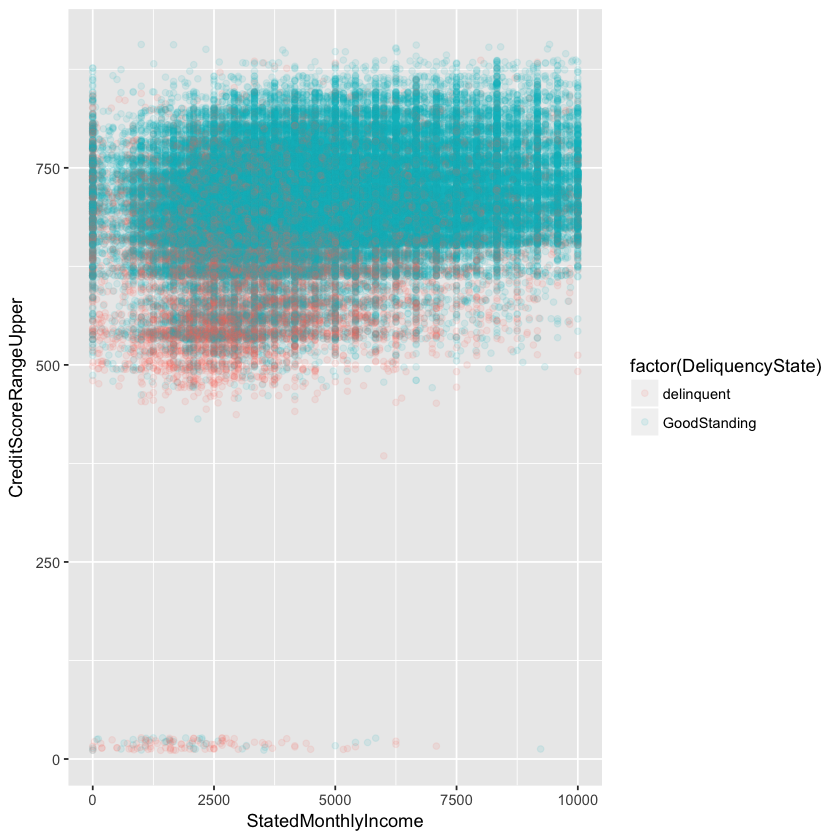

In [260]:
ggplot(data = loan_df, aes(StatedMonthlyIncome, CreditScoreRangeUpper, colour = factor(DeliquencyState))) + 
geom_jitter(alpha = 0.1) + xlim(0, 10000)

# 4.3 Deliquncy State vs borrower's state and loan amount

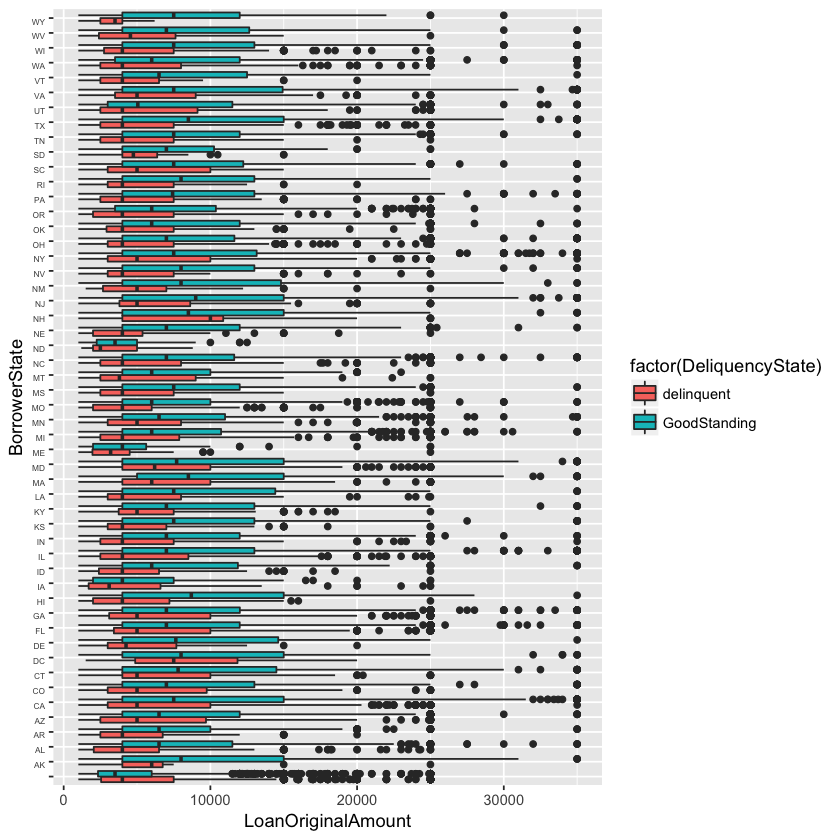

In [298]:
ggplot(loan_df, aes(BorrowerState, LoanOriginalAmount, fill = factor(DeliquencyState))) + geom_boxplot() + coord_flip() + theme(axis.text.y = element_text(size=5,vjust=1)) 

## 4.4 Investors vs Credit Score and Loan Original Amount
As discussed in previous submission review, I figured out a more intuitive way of displaying same result shown in plot 4.2.

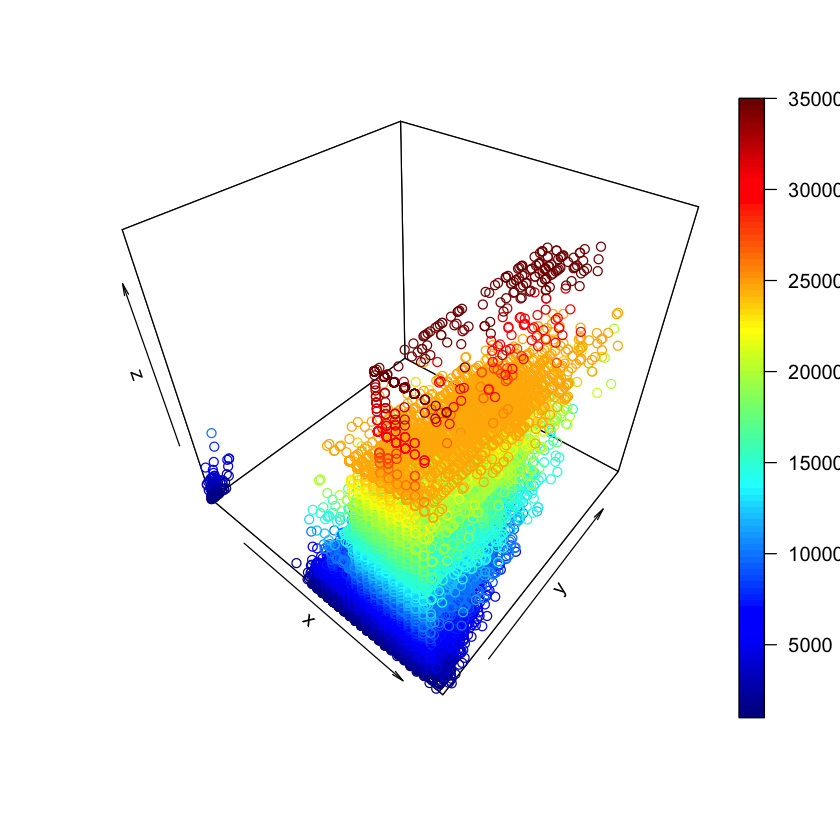

In [310]:
points3D(x = loan_df$CreditScoreRangeUpper, y = loan_df$Investors, z = loan_df$LoanOriginalAmount)

From the 3D plot above, it is obvious that the number of investors goes up as the credit score and loan original amount going up. 


# Multivariate Analysis

### Talk about some of the relationships you observed in this part of the \
investigation. Were there features that strengthened each other in terms of \
looking at your feature(s) of interest?

Relationship between number of investors and credit scores, derived in bivariate analysis are used in conjuntion with the original loan amount in multivariate. The result is significant, these two variables can be used together to built a regression model to predict the number of investors. 

### Were there any interesting or surprising interactions between features?

Seems the prosper score, which is the socre assigned by prosper loan marketplace has strong correlation with the credit score assigned by credit union. This is either because the prosper loan market place assign their score based on credit score from credit union or people's bevaior on the prosper market place reflect their general credit behavior.

### OPTIONAL: Did you create any models with your dataset? Discuss the \
strengths and limitations of your model.

I tried to build a model based as: Investors ~ LoanOriginalAmount + CreditScoreRangeUpper. However, some spricification for linear regression is break, since the purpose is not to build a successful but to identify the general trend between variables, I didn't dived further onto this model. 

------

# 5. Final Plots and Summary

### Plot One


Warning message:
“Removed 11609 rows containing missing values (geom_point).”

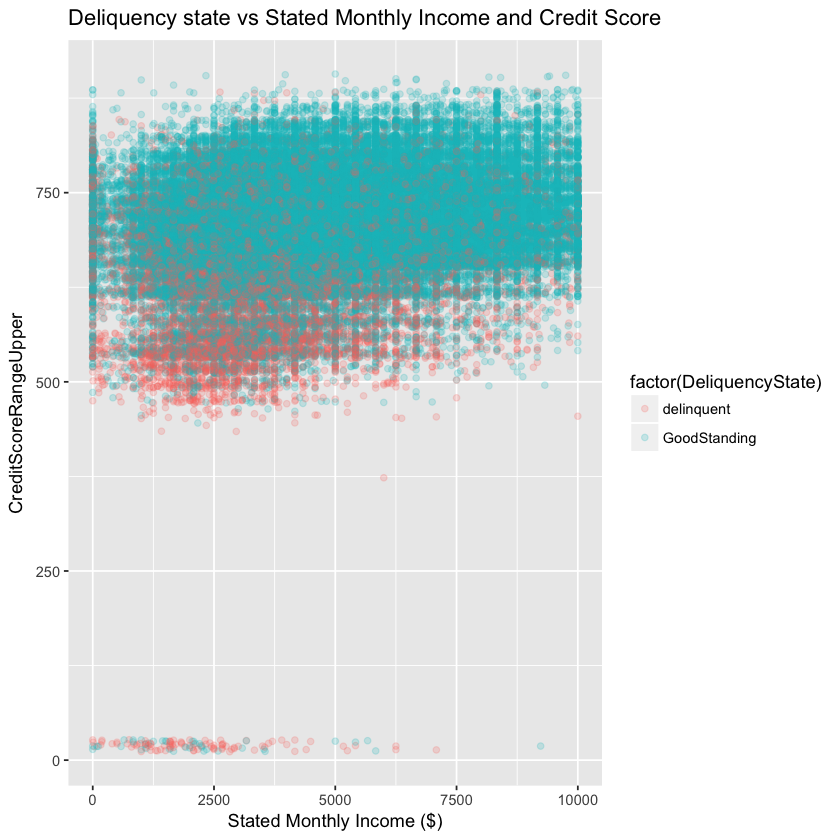

In [271]:
ggplot(data = loan_df, aes(StatedMonthlyIncome, CreditScoreRangeUpper, colour = factor(DeliquencyState))) + 
geom_jitter(alpha = 0.2) + xlim(0, 10000) + labs(title ="Deliquency state vs Stated Monthly Income and Credit Score", x = "Stated Monthly Income ($)")


Even the deliquency status of loans in significant impacted by the credit score of borrowers, the monthly income also plays a role in the behavior of deliquency status. For this plot, it is obvious that lower credit score implies higher chance of deliquent loans. Borrowers with higher monthly income will have higher credit score and higher chance of pay out their loans.

### Plot Two


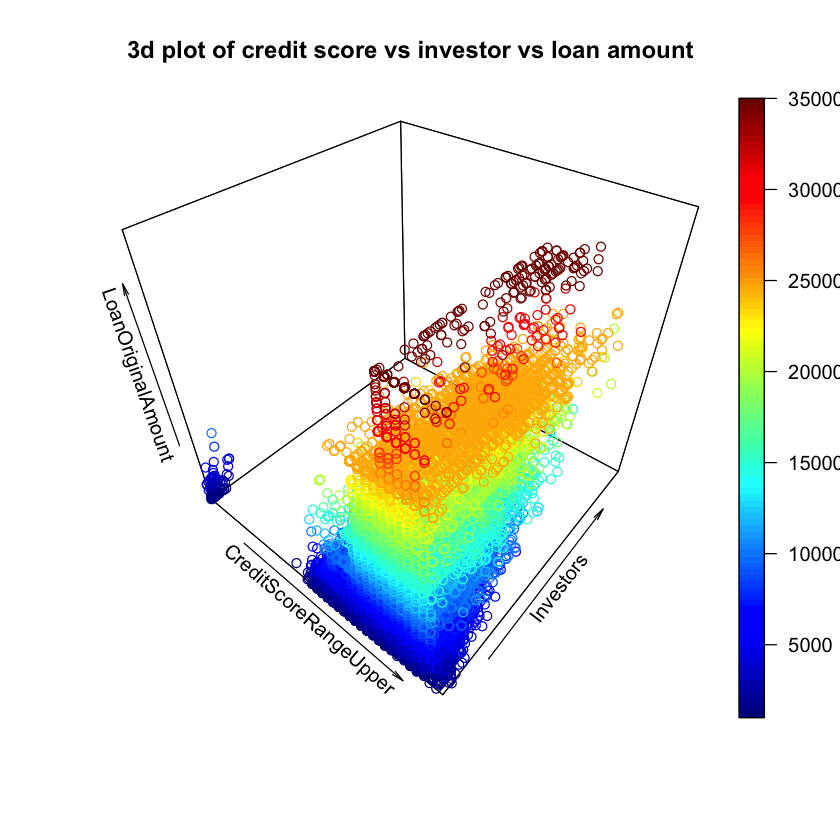

In [312]:
points3D(x = loan_df$CreditScoreRangeUpper, y = loan_df$Investors, z = loan_df$LoanOriginalAmount, xlab = "CreditScoreRangeUpper",
          ylab ="Investors", zlab = "LoanOriginalAmount", main = "3d plot of credit score vs investor vs loan amount")

From the 3D plot above, it is obvious that the number of investors goes up as the credit score and loan original amount going up. The highest number of investors showed up at the highest credit score and loan amount. The front view of this graph shows the relationship between investors and LoanOriginalAmount while the right/side view of this graph shows the relationship between investors and credit scores. 

### Plot Three

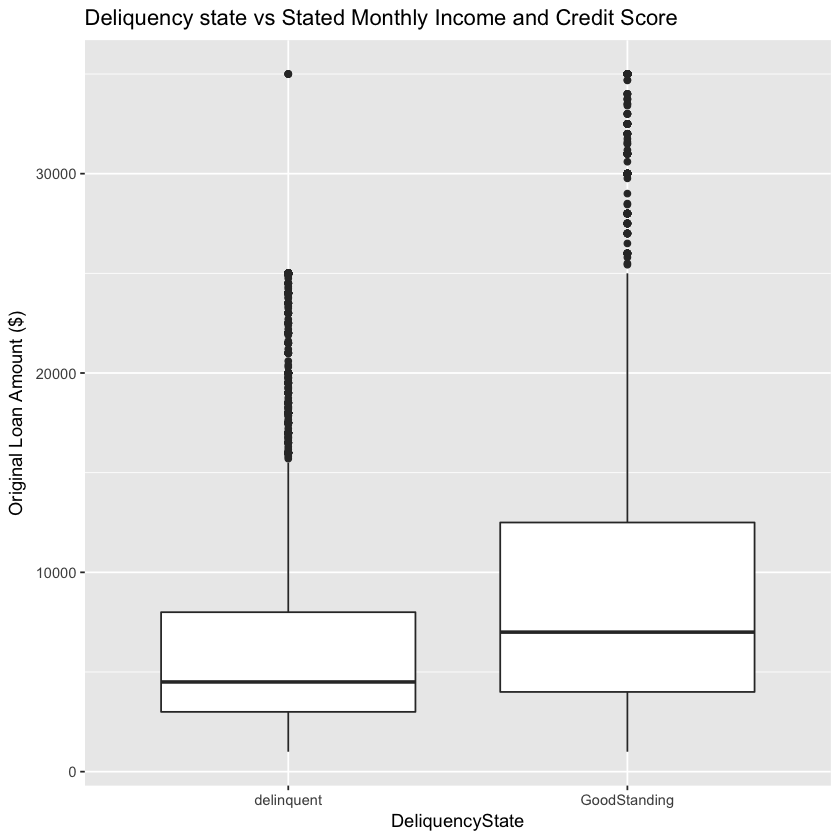

In [268]:

ggplot(data = loan_df, aes(x = DeliquencyState, y = LoanOriginalAmount)) + 
      geom_boxplot()+labs(title ="Deliquency state vs Stated Monthly Income and Credit Score", y = "Original Loan Amount ($)")



From this plot, we got a interesting finding that loans with higher loan original amount owns bettwe chance of good standing at the end. There couple theories for this behaviors. Firstly, this might because these loan has longer payment cycle so that they are still going through the pay back cycle. It coule also because borrowers borrowed a lot from loan companies tend to making better judgement of their financial situation.

------

# 6. Reflection



The Prosper Marketplace is the first P2P loan marketplace in the United States and still operating today. This data set from Prosper Market place contains 81 variables and 113,937 observations. I picked about 20 features for analyzing. 

Started from univariate analysis, I tried to understand the distribution of indivisual variables by using bar-plots and hitograms. I was expecting find much normal behaved variables but suprised by the log-normal and reversed lognormal behaviors found in these variables. For example, both the loan original amount and total credit line in past 7 years showing log normal behaviors. The number of investors ia also showing log-normal distribution in some sense. 

I was struggled while doing linear regresssion about the number of investors. Specificly, although the number of investors, credit score and original loan amount are positively correlated, all specifications for linera regression are failed to hold. However, the dianosis plot successfully dipicted issues with the regression and helped the analysis. The ANOVA table indicated that both the credit score and the original loan amount is significant when predicting the number of investors. 

Because of the good balance between categorical variables and numerical variables as well as the abundantness of information. I think this dataset would be a good resource for machine learning and neural network. I belive that after encode all categorical variables and apply machine learning algorithm, a impressive result is guaranteed.

## 7 Reference

https://yihui.name/knitr/options/

https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf

https://www.statmethods.net/stats/regression.html

https://stackoverflow.com/questions/41205489/different-fill-values-for-different-factors-in-ggplot2

https://stackoverflow.com/questions/41172451/ggplot-with-three-y-variables-r answer from eipi10